<a href="https://colab.research.google.com/github/NaviinRaghav/unimentor/blob/main/Project_5_%E2%80%93_Tobacco_Use_and_Mortality_(2004%E2%80%932015).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

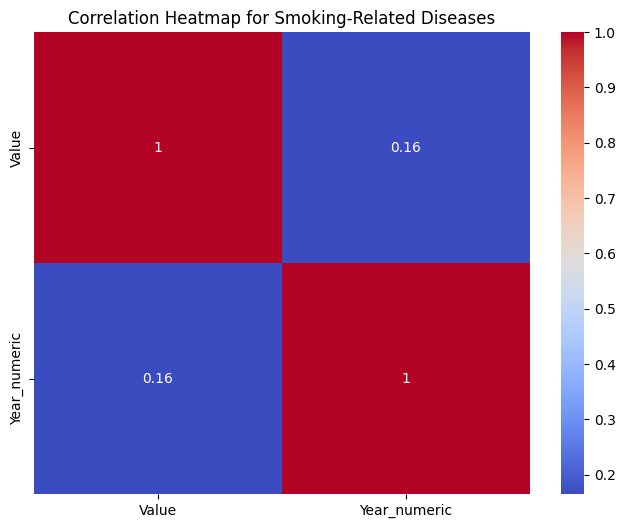

Coefficient: [19291.97575758]
Intercept: -37743759.96363637


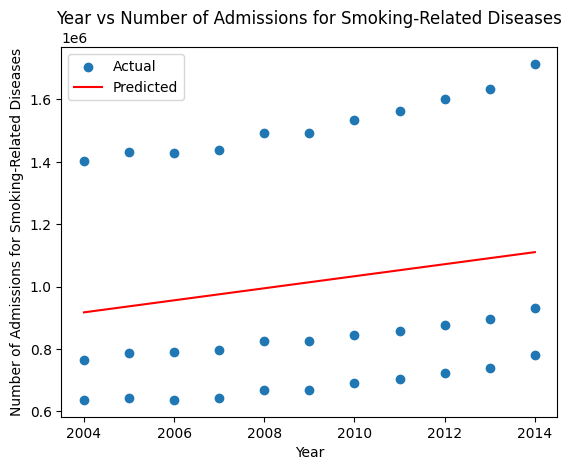

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset
data = pd.read_csv("tobacco_mortality.csv")

# Convert 'Value' column to numeric, coercing errors
data['Value'] = pd.to_numeric(data['Value'], errors='coerce')

# Filter data for 'All diseases which can be caused by smoking'
smoking_related_data = data[data['ICD10 Diagnosis'] == 'All diseases which can be caused by smoking'].copy()

# Extract year from the 'Year' column and convert to numeric
smoking_related_data['Year_numeric'] = smoking_related_data['Year'].str.split('/').str[0].astype(int)

# Correlation analysis (only on the Value and Year_numeric for the filtered data)
plt.figure(figsize=(8,6))
numeric_smoking_data = smoking_related_data[['Value', 'Year_numeric']].dropna()
if not numeric_smoking_data.empty:
    sns.heatmap(numeric_smoking_data.corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap for Smoking-Related Diseases")
    plt.show()
else:
    print("Not enough data for correlation heatmap after filtering and dropping NaNs.")

# Regression: Year vs Value (number of admissions for smoking-related diseases)
if not numeric_smoking_data.empty:
    X = numeric_smoking_data[["Year_numeric"]]
    y = numeric_smoking_data["Value"]

    model = LinearRegression()
    model.fit(X, y)

    print("Coefficient:", model.coef_)
    print("Intercept:", model.intercept_)

    # Prediction
    y_pred = model.predict(X)

    plt.scatter(X, y, label="Actual")
    plt.plot(X, y_pred, color="red", label="Predicted")
    plt.xlabel("Year")
    plt.ylabel("Number of Admissions for Smoking-Related Diseases")
    plt.legend()
    plt.title("Year vs Number of Admissions for Smoking-Related Diseases")
    plt.show()
else:
    print("Not enough data for regression analysis after filtering and dropping NaNs.")

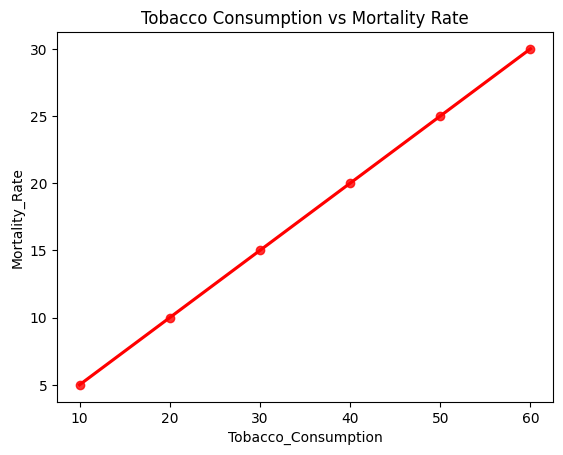

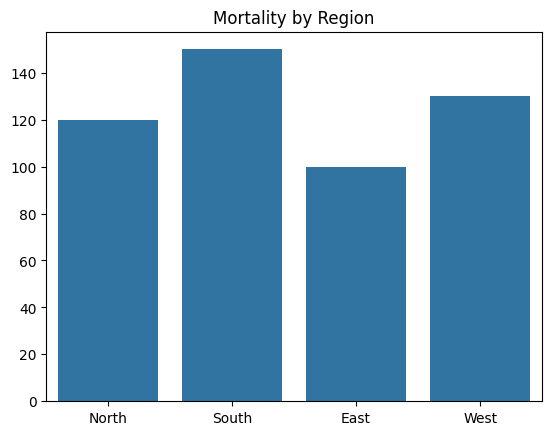

In [8]:
import seaborn as sns

# Example data
df = pd.DataFrame({
    "Tobacco_Consumption":[10,20,30,40,50,60],
    "Mortality_Rate":[5,10,15,20,25,30]
})

# Scatter with regression line
sns.regplot(x="Tobacco_Consumption", y="Mortality_Rate", data=df, color="red")
plt.title("Tobacco Consumption vs Mortality Rate")
plt.show()

# Bar Chart by Region
regions = ["North","South","East","West"]
mortality = [120,150,100,130]
sns.barplot(x=regions, y=mortality)
plt.title("Mortality by Region")
plt.show()


In [11]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.8 MB/s eta 0:00:00


In [13]:
import plotly.express as px
import pandas as pd

# Assuming 'df' DataFrame is already defined and contains 'Tobacco_Consumption' and 'Mortality_Rate'
# If not, you'll need to load or create the DataFrame here

fig = px.scatter(df, x="Tobacco_Consumption", y="Mortality_Rate",
                 trendline="ols", title="Tobacco vs Mortality")
fig.show()